Universidad del Valle de Guatemala <br>
Facultad de Ingeniería <br>
Departamento de Ciencias de la Computación <br>
Modelación y Simulación <br>
<br>
Integrantes:
- Gabriel Vicente
- Marco Orozco
- Ma. Isabel Solano

## Simulación de flujo de tráfico

En esta parte se realizan las simulaciones. El archivo de Ej2_animacion.py solamente es para ver el resultado animado

In [107]:
import random
import matplotlib.pyplot as plt

In [108]:
class Vehiculo():
    def __init__(self, v, c):
        self.v = v # Velocidad 
        self.a = "Normal" # Actitud
        self.p = 0 # Posicion
        self.c = c # Carril 

    def mover(self, tiempo, vehiculos):
        self.p += self.v  * tiempo

    def cambiar_carril(self, nuevo_carril):
        # Probabilidad de cambiar de carril
        self.c = nuevo_carril

    def __str__(self) -> str:
        return f"Vehiculo: {self.a} | carril {self.c} | posicion {self.p} | velocidad {self.v}"


In [109]:
def encontrar_vehiculo(carril:int, posicion:int, vehiculos:list):
    vmc = None # Vehiculo más cercano
    dist_min = float('inf')

    for v in vehiculos:
        if v.c == carril and v.p > posicion: 
            distancia = v.p - posicion
            if distancia < dist_min:
                dist_min = distancia
                vmc = v

    return vmc

In [110]:
class Vehiculo_Agresivo(Vehiculo):
    def __init__(self, v, c):
        super().__init__(v, c)
        self.a = "Agresivo"

    def cambiar_carril(self, nuevo_carril):
        cambio = random.random()
        if cambio < 0.3:
            super().cambiar_carril(nuevo_carril)

In [111]:
class Vehiculo_Cauteloso(Vehiculo):
    def __init__(self, v, c):
        super().__init__(v, c)
        self.a = "Cauteloso"

    def mover(self, tiempo, vehiculos):
        distancia_segura = 10.0
        vehiculo_enfrente = encontrar_vehiculo(self.c, self.p, vehiculos)
        if vehiculo_enfrente and (vehiculo_enfrente.p - self.p) < distancia_segura:
            self.v = vehiculo_enfrente.v
        super().mover(tiempo, vehiculos)

    def cambiar_carril(self, nuevo_carril):
        cambio = random.random()
        if cambio < 0.7:
            super().cambiar_carril(nuevo_carril)

In [112]:
cant_carriles = 5
cant_vehiculos = 10

vehiculos = []
for _ in range(cant_vehiculos):
    carril = random.randint(0, cant_carriles-1)
    velocidad = random.uniform(20, 30)
    actitud = random.choice([Vehiculo_Agresivo, Vehiculo_Cauteloso])
    vehiculo = actitud(velocidad, carril)
    vehiculos.append(vehiculo)

Vehiculo: Agresivo | carril 3 | posicion 20.053589968864873 | velocidad 20.053589968864873
Vehiculo: Agresivo | carril 3 | posicion 27.201077514315536 | velocidad 27.201077514315536
Vehiculo: Agresivo | carril 1 | posicion 21.3332136960428 | velocidad 21.3332136960428
Vehiculo: Cauteloso | carril 2 | posicion 27.263084989867934 | velocidad 27.263084989867934
Vehiculo: Cauteloso | carril 3 | posicion 28.089759441221577 | velocidad 28.089759441221577
Vehiculo: Cauteloso | carril 4 | posicion 22.550974646668422 | velocidad 22.550974646668422
Vehiculo: Cauteloso | carril 0 | posicion 27.6644253008561 | velocidad 27.6644253008561
Vehiculo: Cauteloso | carril 0 | posicion 23.294213805896142 | velocidad 23.294213805896142
Vehiculo: Agresivo | carril 1 | posicion 29.116782173836263 | velocidad 29.116782173836263
Vehiculo: Agresivo | carril 4 | posicion 23.712569227487407 | velocidad 23.712569227487407
Vehiculo: Agresivo | carril 3 | posicion 40.10717993772975 | velocidad 20.053589968864873
Veh

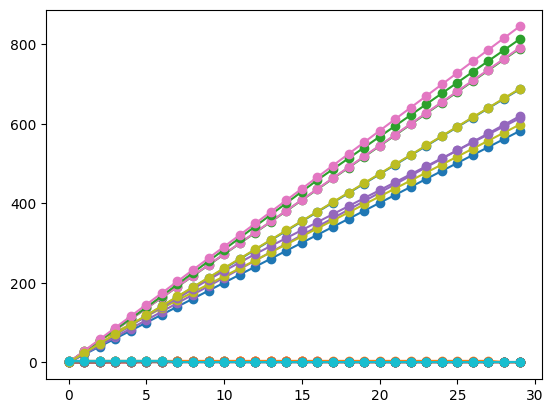

In [113]:
tiempo = 1
duracion = 30

historial_posiciones = [[] for _ in range(cant_vehiculos)]

plt.figure()

for _ in range(duracion):
    for i, vehiculo in enumerate(vehiculos):
        historial_posiciones[i].append((vehiculo.p, vehiculo.c))
        vehiculo.mover(tiempo, vehiculos)
        prob_cambio = random.random()
        if prob_cambio < 0.1:
            carriles_temp = list(range(cant_carriles))
            # evitamos que se pase al mismo carril
            carriles_temp = [x for x in carriles_temp if x!= vehiculo.c]
            Ncarril = random.choice(carriles_temp)
            if (vehiculo.c != Ncarril):
                vehiculo.cambiar_carril(tiempo)

    for vehiculo in vehiculos:
        print(vehiculo)
    print("="*40)

    # input("ENTER PARA CONTINUAR")

In [114]:
for x in historial_posiciones:
    print(x)

[(0, 3), (20.053589968864873, 3), (40.10717993772975, 3), (60.16076990659462, 3), (80.2143598754595, 3), (100.26794984432436, 3), (120.32153981318923, 3), (140.3751297820541, 3), (160.428719750919, 3), (180.48230971978387, 3), (200.53589968864875, 3), (220.58948965751364, 3), (240.64307962637852, 3), (260.6966695952434, 3), (280.75025956410826, 3), (300.8038495329731, 3), (320.857439501838, 1), (340.91102947070283, 1), (360.9646194395677, 1), (381.01820940843254, 1), (401.0717993772974, 1), (421.12538934616225, 1), (441.1789793150271, 1), (461.23256928389196, 1), (481.2861592527568, 1), (501.3397492216217, 1), (521.3933391904866, 1), (541.4469291593515, 1), (561.5005191282164, 1), (581.5541090970813, 1)]
[(0, 3), (27.201077514315536, 3), (54.40215502863107, 3), (81.60323254294661, 3), (108.80431005726214, 3), (136.00538757157767, 3), (163.2064650858932, 3), (190.40754260020873, 3), (217.60862011452426, 3), (244.80969762883979, 3), (272.01077514315534, 3), (299.2118526574709, 3), (326.4

Resultado de las rutas

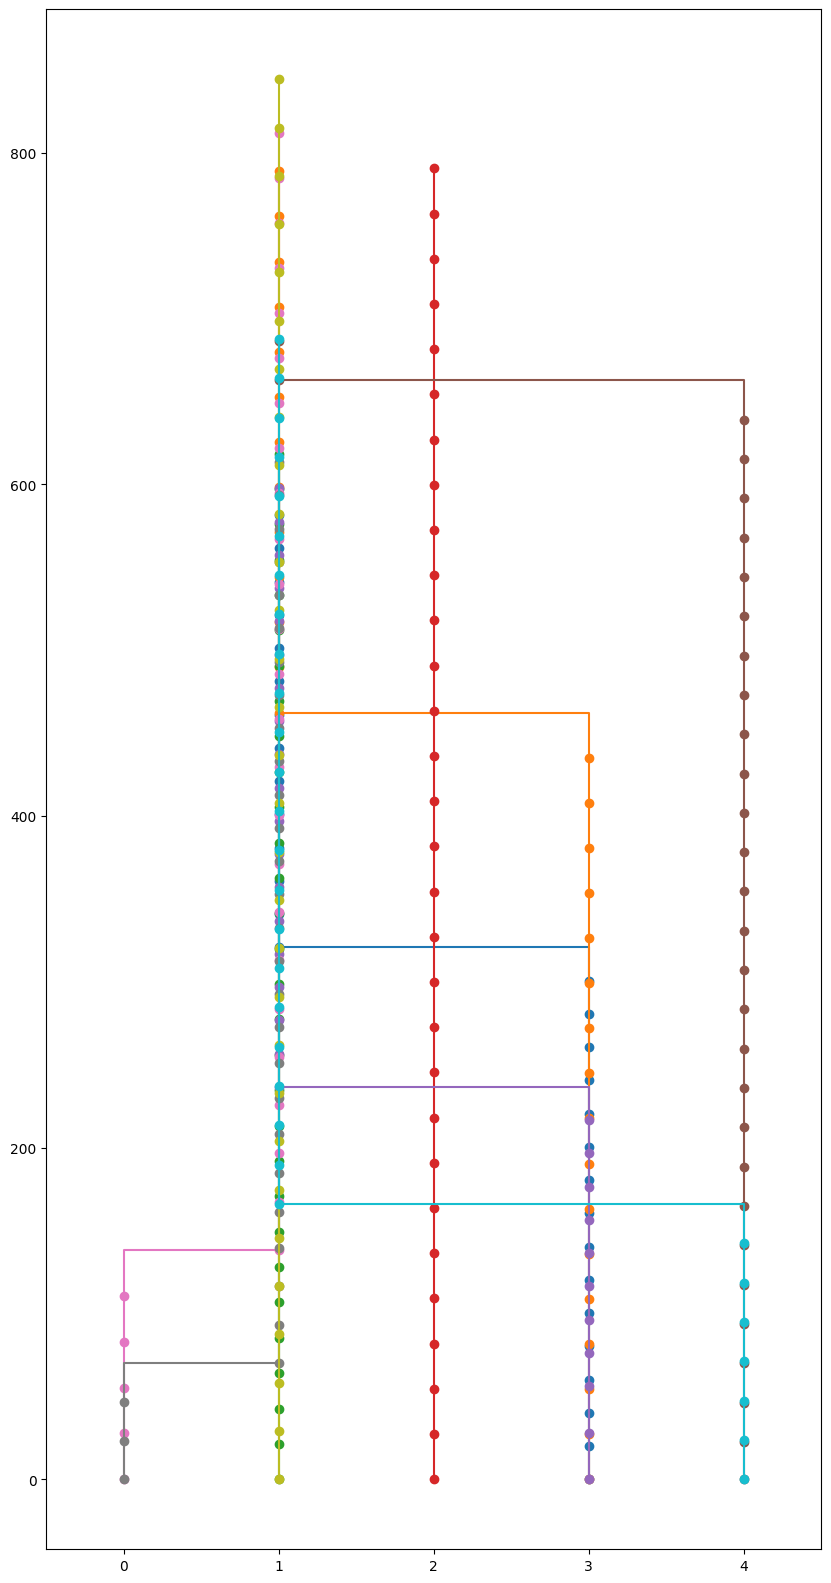

In [115]:
fig, ax = plt.subplots(figsize=(10, 20))

X = []
Y = []

for step in range(len(historial_posiciones)):
    x = [v[0] for v in historial_posiciones[step]]
    X.append(x)
    y = [v[1] for v in historial_posiciones[step]]
    Y.append(y)

    plt.xlim(-0.5, 4.5)

    plt.step(y, x, marker = "o")


¿Qué comportamientos puede observar en los diferentes tipos de comportamiento de manejo de vehículos?
- Que no todos los vehículos se cambain de carril
- Por algún motivo los vehículos convergen en un mismo carril

¿Cómo mejoraría este modelo?
- Se podrían incluir más elementos como peatones, señales de tránsito, tipos de vehículo.
- Se podrían agregar más atributos a las clases, como tipo de vehículo, probabilidad de que se arruine el auto, etc.


Guardamos la información en un csv para poder verlo animado en Ej2_animacion.py

In [116]:
import csv

# Guardamos todo en csv para poder leerlos luego en un programa de python para poder verlo animado

fp_X = "X.csv"

with open(fp_X, mode="w", newline="") as file:  
    writer = csv.writer(file)

    for row in X:
        linea = ""
        for col in row:
            linea += str(col) + ","
        writer.writerow(row)

fp_Y = "Y.csv"

with open(fp_Y, mode="w", newline="") as file:  
    writer = csv.writer(file)

    for row in Y:
        linea = ""
        for col in row:
            linea += str(col) + ","
        writer.writerow(row)
